In [89]:
import itertools
import random
class blackjack:
    def __init__(self,deck=4):
        self.deck=deck
        color=["heart","spade","diamond","club"]
        number=["A","2","3","4","5","6","7","8","9","10","J","Q","K"]*self.deck
        self.allCard=list(itertools.product(color,number))
    def shuffle(self):
        color=["heart","spade","diamond","club"]
        number=["A","2","3","4","5","6","7","8","9","10","J","Q","K"]*self.deck
        self.allCard=list(itertools.product(color,number))
        return
    def serve(self):
        try:
            card=random.choice(self.allCard)
            self.allCard.remove(card)
            return card
        except:
            blackjack.shuffle(self)
            card=random.choice(self.allCard)
            self.allCard.remove(card)
            return card
    def strat(self):
        playerBusted=0
        dealerBusted=0
        dealerInitial=[blackjack.serve(self)]
        playerInitial=[blackjack.serve(self),blackjack.serve(self)]
        dealerInitialNum=[dealerInitial[0][1]]
        if dealerInitialNum[0]=="J" or dealerInitialNum[0]=="Q" or dealerInitialNum[0]=="K":
            dealerInitialNum[0]=10
        if dealerInitialNum[0]=="A":
            dealerInitialNum[0]=11
        dealerSum=int(dealerInitialNum[0])
        playerInitialNum=[playerInitial[0][1],playerInitial[1][1]]
        if playerInitialNum[0]=="J" or playerInitialNum[0]=="Q" or playerInitialNum[0]=="K":
            playerInitialNum[0]=10
        if playerInitialNum[1]=="J" or playerInitialNum[1]=="Q" or playerInitialNum[1]=="K":
            playerInitialNum[1]=10
        if playerInitialNum[0]=="A":
            playerInitialNum[0]=11
        if playerInitialNum[1]=="A":
            playerInitialNum[1]=11
        if not (playerInitialNum[0]==11 and playerInitialNum[1]==11):
            playerInitialSum=int(playerInitialNum[0])+int(playerInitialNum[1])
        else:
            playerInitialNum[0]=11
            playerInitialNum[1]=1
            playerInitialSum=int(playerInitialNum[0])+int(playerInitialNum[1])
        #player blackjack
        if playerInitialSum==21:
#             print(dealerInitialNum)
#             print(playerInitialNum)
#             print(dealerSum)
#             print(playerInitialSum)            
            return 1.2
        #free double
        freeDouble=0
        if playerInitialSum==9 or playerInitialSum==10 or playerInitialSum==11:
            playerNewCard=blackjack.serve(self)[1]
            if playerNewCard=="J" or playerNewCard=="Q" or playerNewCard=="K":
                playerNewCard=10
            if playerNewCard=="A":
                playerNewCard=11
            playerInitialNum.append(playerNewCard)
            playerInitialSum+=int(playerNewCard)
            if playerInitialSum>21 and 11 in playerInitialNum:
                playerInitialSum=playerInitialSum-10
                playerInitialNum=[1 if m==11 else m for m in playerInitialNum]
            freeDouble=1
        #player hit/stop
        else:
            for i in range(3):
                if playerInitialSum<=13 or ((playerInitialSum==14 or playerInitialSum==15) and int(dealerInitialNum[0])>7):
                    playerNewCard=blackjack.serve(self)[1]
                    if playerNewCard=="J" or playerNewCard=="Q" or playerNewCard=="K":
                        playerNewCard=10
                    if playerNewCard=="A":
                        playerNewCard=11
                    playerInitialNum.append(playerNewCard)
                    playerInitialSum+=int(playerNewCard)
                    if playerInitialSum>21 and 11 in playerInitialNum:
                        playerInitialSum=playerInitialSum-10
                        playerInitialNum=[1 if m==11 else m for m in playerInitialNum]
        if playerInitialSum>21:
            playerBusted=1
        #Dealer hit/stop
        for j in range(10):
            if dealerSum<17:
                dealerNewCard=blackjack.serve(self)[1]
                if dealerNewCard=="J" or dealerNewCard=="Q" or dealerNewCard=="K":
                    dealerNewCard=10
                if dealerNewCard=="A":
                    dealerNewCard=11
                dealerInitialNum.append(dealerNewCard)
                dealerSum+=int(dealerNewCard)
                if dealerSum>21 and 11 in dealerInitialNum:
                    dealerSum=dealerSum-10
                    dealerInitialNum=[1 if m==11 else m for m in dealerInitialNum]
#         print(dealerInitialNum)
#         print(playerInitialNum)
#         print(dealerSum)
#         print(playerInitialSum)   
        #Win / Lose
        if dealerSum>21:
            dealerBusted=1
        if len(dealerInitialNum)==2 and dealerSum==21:
            return -1.2
        if playerBusted==0 and dealerBusted==0:
            if playerInitialSum>dealerSum and freeDouble==1:
                return 2
            if playerInitialSum>dealerSum and freeDouble==0:
                return 1
            if playerInitialSum<dealerSum:
                return -1
            if playerInitialSum==dealerSum:
                return 0
        if playerBusted==0 and dealerBusted==1:
            if freeDouble==1:
                return 2
            else:
                return 1
        if playerBusted==1:
            return -1

In [183]:
a=blackjack(deck=1)

In [197]:
#print("Final expectations of your money (Starting from Scratch) is %0.4f"% (sum(position)/rep))
import numpy as np
import sys
finalResult=[]
times=100
rep=100000
winningRate=[]
position=[]
path={}
for j in range(rep):
    result=[]
    for i in range(times):
        result.append(blackjack.strat(self=a))
        cumSum=np.cumsum(result)
    path[j]=cumSum
    money=sum(result)
    position.append(money)
    sys.stdout.write('\r %.1f%% completed ' % ((j+1)*100/rep))
    sys.stdout.flush()
print("\nWinning rate of playing %d times using %d repetition test is %0.4f" % (times,rep,sum(n > 0 for n in position)/rep))

 100.0% completed 
Winning rate of playing 100 times using 100000 repetition test is 0.4889


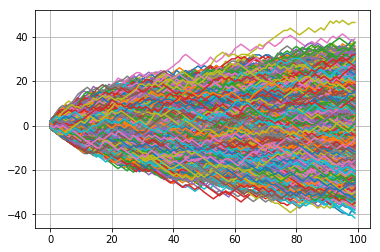

In [176]:
import matplotlib.pyplot as plt
for key in path.keys():
    plt.plot(path[key])
plt.grid()
plt.show()

(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    1.,    1.,    0.,    0.,    1.,
           0.,    2.,    0.,    0.,    1.,    0.,    0.,    1.,    0.,
           0.,    1.,    3.,    0.,    2.,    1.,    0.,    1.,    1.,
           0.,    0.,    0.,    1.,    4.,    0.,    1.,    0.,    0.,
           1.,    4.,    1.,    2.,    1.,    1.,    1.,    5.,    2.,
           1.,    3.,    1.,    2.,    7.,    3.,    7.,    2.,    7.,
           6.,    5.,    5.,    4.,    5.,    6.,    5.,    4.,    8.,
           5.,   13.,    6.,    9.,   15.,   21.,    7.,    5.,    9.,
           0.,   17.,   14.,   16.,   16.,   20.,   20.,   18.,   21.,
          33.,   24.,   26.,   20.,   29.,   22.,   27.,   32.,   29.,
          38.,   39.,   49.,   46.,   40.,   33.,   47.,   43.,   46.,
          46.,   70.,   63.,   61.,   65.,   61.,   58.,   73.,   81.,
      

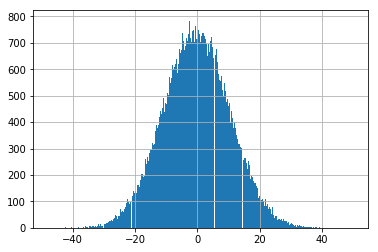

In [210]:
bins = np.arange(min(position), max(position), (max(position)-min(position))/500)
plt.grid()
plt.hist(position,bins=bins)

In [201]:
min(position)

-47.8

In [211]:
from scipy.stats import skew
skew(position)

0.03388314088330426